In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

from collections import Counter

C:\Users\swastik\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
X, Y = make_classification(n_samples=20000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.95, 0.05],
                            class_sep=0.8, random_state=100)


In [32]:
X1, X2 = list(), list()
for i, j in enumerate(X):
    X1.append(j[0])
    X2.append(j[1])

In [33]:
df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})

In [20]:
pal = sns.color_palette('tab10')
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


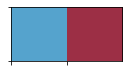

In [23]:
#sns.set_palette('icefire')
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

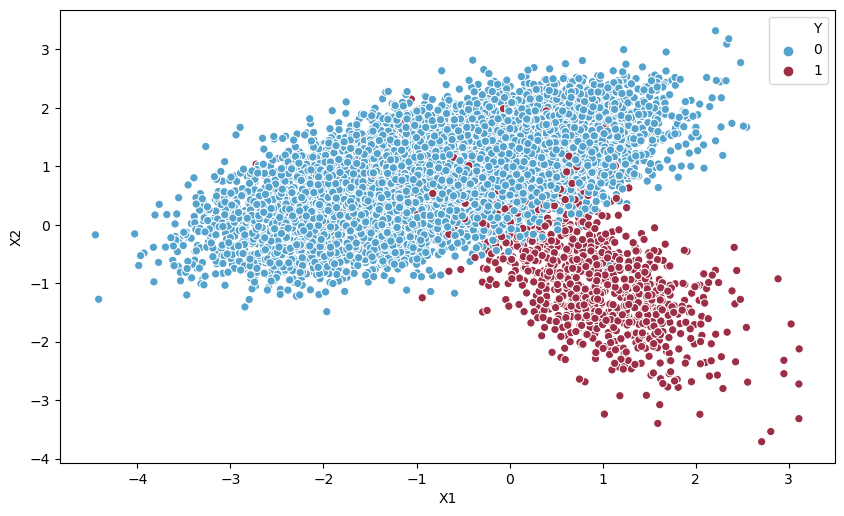

In [34]:
# Imblanced Data
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df)
plt.show()

In [24]:
df['Y'].value_counts()

0    18909
1     1091
Name: Y, dtype: int64

In [35]:
x = df.drop('Y', axis=1)
y = df['Y']

## Resampling Techniques: SMOTE, ADASYN, SMOTE + Tomek Links, SMOTE + ENN

In [36]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train1, y_train1 = smt.fit_resample(x, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 18909, 1: 1091})
After Counter({0: 18909, 1: 18909})


In [37]:
df_sm = X_train1.copy()
df_sm['Y'] = y_train1

In [38]:
from imblearn.over_sampling import ADASYN

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
ada = ADASYN()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train1, y_train1 = ada.fit_resample(x, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 18909, 1: 1091})
After Counter({1: 18966, 0: 18909})


In [39]:
df_ada = X_train1.copy()
df_ada['Y'] = y_train1

In [40]:
from imblearn.combine import SMOTETomek

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train1, y_train1 = smtom.fit_resample(x, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 18909, 1: 1091})
After Counter({0: 18098, 1: 18098})


In [41]:
df_smtom = X_train1.copy()
df_smtom['Y'] = y_train1

In [42]:
from imblearn.combine import SMOTEENN

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(x, y)

counter = Counter(y_train1)
print('After',counter)

Before Counter({0: 18909, 1: 1091})
After Counter({1: 16422, 0: 15405})


In [43]:
df_smenn = X_train1.copy()
df_smenn['Y'] = y_train1

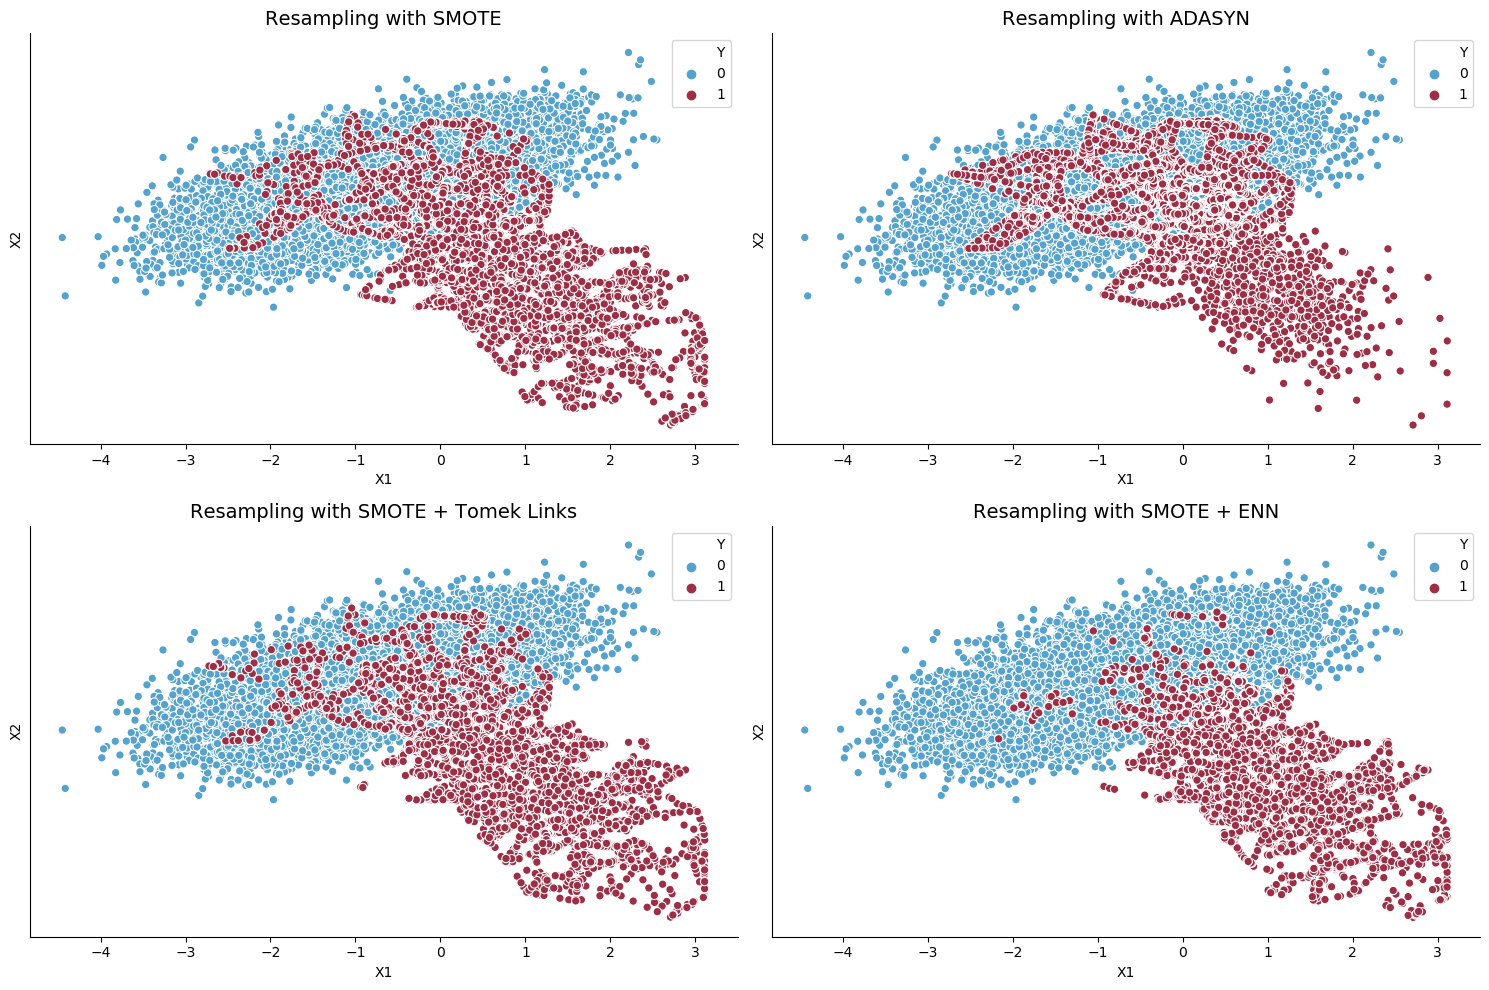

In [44]:
f, axes = plt.subplots(2,2,figsize=(15, 10), dpi=100)
sns.despine()
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_sm, ax=axes[0,0])
axes[0,0].set_title('Resampling with SMOTE', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ada, ax=axes[0,1])
axes[0,1].set_title('Resampling with ADASYN', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smtom, ax=axes[1,0])
axes[1,0].set_title('Resampling with SMOTE + Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smenn, ax=axes[1,1])
axes[1,1].set_title('Resampling with SMOTE + ENN', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()